In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data_1024.csv', sep='\t')
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [3]:
df.drop(columns=['Driver_ID'], inplace=True) # ID não inflienciará no Cluster
df.head()

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


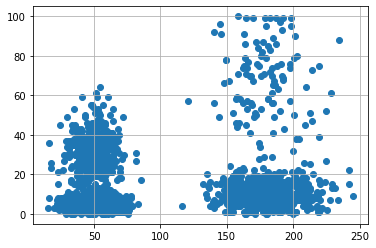

In [4]:
plt.scatter(x=df.values[:, 0], y=df.values[:, 1])
plt.grid();

# Clusterização:
## Método do Cotovelo para identificar o melhor número de clusters

In [5]:
from sklearn.cluster import KMeans

Para descobrir o melhor número do clusters no metodo cotovelo é só verificar a inércia de cada k-means, o primeiro que apresentar uma diferenca peuena é o número escolhido

In [6]:
inertias = []
inicio = 1
fim = 8
for i in range(inicio, fim):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(df.values)
    inertias.append(km.inertia_)

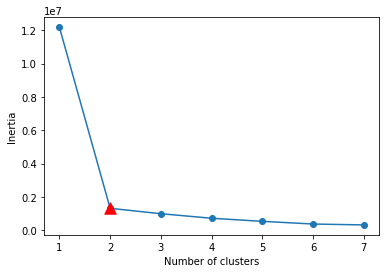

In [7]:
plt.plot(range(inicio, fim), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(inicio, fim, step=1))
plt.scatter(2, inertias[1], c='r', marker='^', s=130, zorder=fim+1);

### Podemos observar que o Método do ccotovelo demonstra que o melhor número de clusters a ser usado é 2

In [8]:
KM = KMeans(n_clusters=2, init='k-means++')
y = KM.fit_predict(df.values)
centroids = KM.cluster_centers_

In [9]:
centroids

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

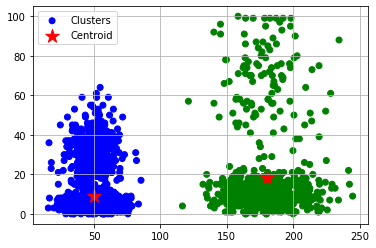

In [10]:
colors = np.array(["blue", "green", "black"]) # tem que ser o mesmo tamanho dos clusters
plt.scatter(x=df.values[:, 0], y=df.values[:, 1], c=colors[y], label='Clusters');
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], c='r', marker='*', s=200, label='Centroid')
plt.grid()
plt.legend(scatterpoints=1);

# Clusterização Hierárquica
## Dendograma

In [11]:
from scipy.cluster.hierarchy import complete, dendrogram, cut_tree
from scipy.spatial.distance import pdist

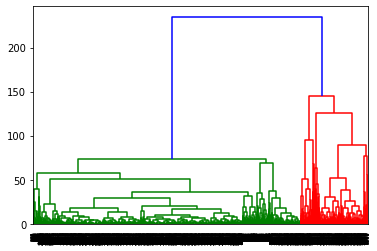

In [12]:
distance_matrix = pdist(df.values, metric='euclidean')
cluster_model = complete(distance_matrix)
dendogram = dendrogram(cluster_model)
sensor_cluster_list = cut_tree(cluster_model, n_clusters=2) # não entendi nada

In [14]:
sensor_cluster_list = sensor_cluster_list.reshape(4000,)

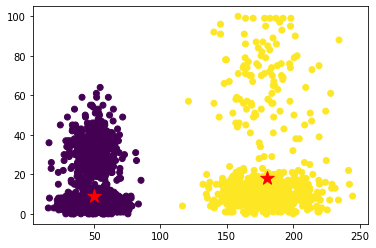

In [16]:
plt.scatter(x=df.values[:, 0], y=df.values[:, 1], c=sensor_cluster_list, label='Clusters');
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], c='r', marker='*', s=200, label='Centroid');

# DBSCAN

In [17]:
from sklearn.cluster import DBSCAN

array([-1,  0,  1])

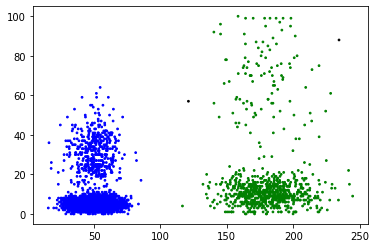

In [23]:
dbscan = DBSCAN(eps=33, min_samples=60).fit(df.values)
colors = np.array(["blue", "green", "black"]) # tem que ser o mesmo tamanho dos clusters
plt.scatter(x=df.values[:, 0], y=df.values[:, 1], c=colors[dbscan.labels_], s=3);